## Autonomous drone to identify iris

- We want to make a autonomous drone which is going to identify iris species.
- It is going to measure the length and width of the sepals and petals.
- Use the Iris dataset to design a simple machine learning model.



In [2]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### Prepare the data

In [3]:
data = load_iris() #shift+tab

In [4]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
df = load_iris(as_frame=True) #shift+tab as_frame

In [6]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame()

### slicing

In [8]:
data['data'][:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [9]:
data['data'][0,:]

array([5.1, 3.5, 1.4, 0.2])

In [10]:
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

In [11]:
display(df)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df.to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
X = df.to_numpy() # These are our features

In [14]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
df['target'] = data['target']

In [16]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])


In [18]:
df['species_name'] = named_targets

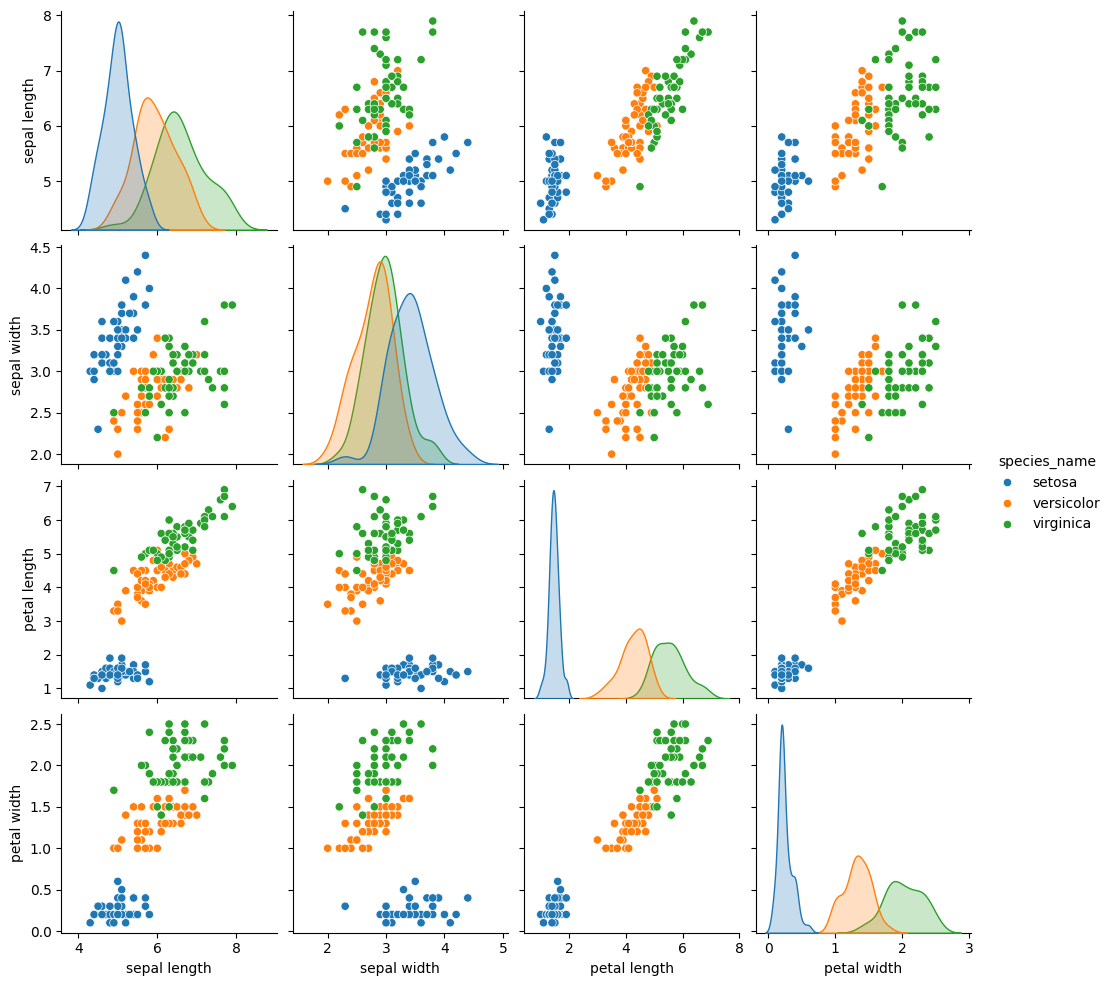

In [19]:
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

In [20]:
y = df['target'].to_numpy()

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### using only the first four features

In [22]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)

In [23]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 4)
X_test shape : (45, 4)
y_train shape : (105,)
y_test shape : (45,)


## data preparation is complete (on to algorithms)

In [24]:
class My_KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for i in range(X_test.shape[0]):
            predictions.append(self._knn_classifier(X_test[i]))
        return predictions
    def _knn_classifier(self, X_test):
        distances, targets = [], []
        for i in range(self.X_train.shape[0]):
            distance = np.linalg.norm(self.X_train[i]-X_test)
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.y_train[index])
        return max(targets, key=targets.count)

model = My_KNNClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

0.9555555555555556


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



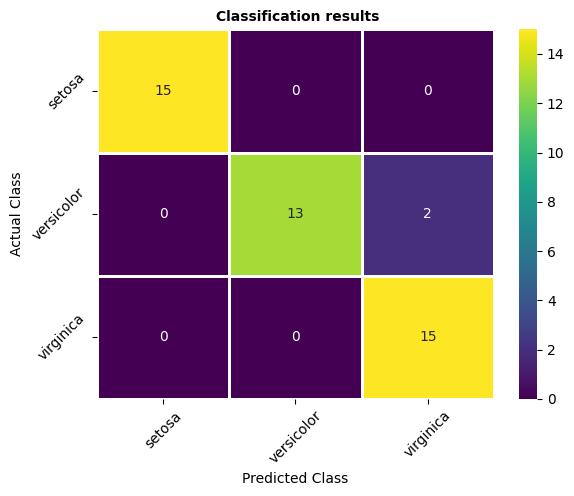

In [25]:

cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(data.target_names);
ax.set_yticklabels(data.target_names);
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(y_test, model.predict(X_test)))

### remember we had a balanced dataset, if the dataset was imbalanced we will have to carefully choose a suitable metric.

### let's see how sklearn performs

preds: [2 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 2 2 0 2 1 1 2 1]
actual: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 1 2 0 2 1 1 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



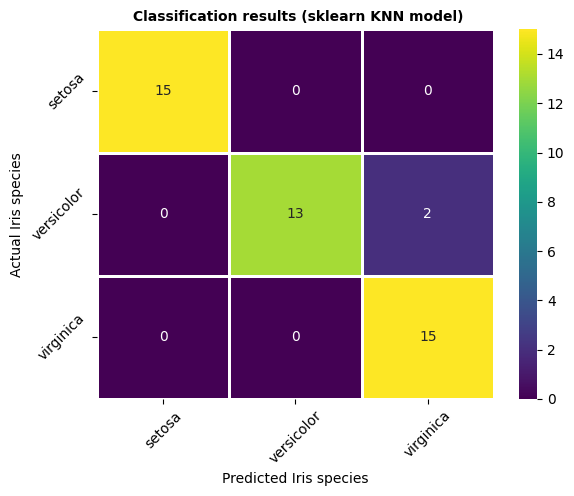

In [26]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(data.target_names);
ax.set_yticklabels(data.target_names);
plt.xlabel('Predicted Iris species');
plt.ylabel('Actual Iris species');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))

# how to find a good k via cross-validation , Tuning the hyperparameter k

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    "n_neighbors": range(1, 10),
    "p": range(1, 4),
}
grid_search = GridSearchCV(
    KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=10,verbose=1,n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10), 'p': range(1, 4)},
             scoring='accuracy', verbose=1)

In [28]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.0011677 , 0.00149338, 0.00140345, 0.0012959 , 0.00099387,
       0.00170319, 0.00194042, 0.00097551, 0.00140979, 0.00105026,
       0.00178306, 0.00109353, 0.00170264, 0.00118022, 0.00104816,
       0.00104709, 0.00109828, 0.00099461, 0.00109136, 0.00107076,
       0.0010083 , 0.00103371, 0.00098162, 0.00105178, 0.00103321,
       0.00129099, 0.00104463]), 'std_fit_time': array([1.83872515e-04, 1.13426914e-03, 1.21343037e-03, 7.01495961e-04,
       6.58853858e-05, 2.11730382e-03, 2.11808030e-03, 3.83786083e-05,
       1.22417954e-03, 2.13312170e-04, 1.90482742e-03, 1.43634093e-04,
       1.50322445e-03, 6.13920978e-04, 7.01535923e-05, 5.70271924e-05,
       1.31421816e-04, 1.74407876e-05, 2.50019920e-04, 9.61831168e-05,
       4.50305040e-05, 7.93928176e-05, 6.61534700e-05, 9.99880592e-05,
       8.99219432e-05, 5.50108068e-04, 6.84372007e-05]), 'mean_score_time': array([0.00396314, 0.00379949, 0.0041497 , 0.00360811, 0.00364881,
       0.00363779, 0.00352464

In [29]:
print(grid_search.best_score_)

0.9818181818181818


preds: [2 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 2 2 0 2 1 1 2 1]
actual: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 1 2 0 2 1 1 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



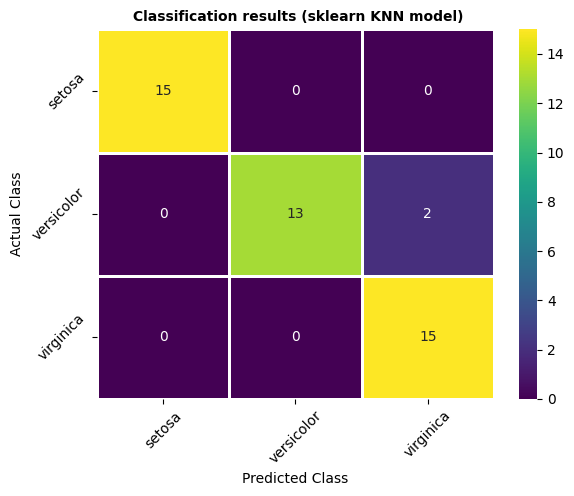

In [30]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3, p=1)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(data.target_names);
ax.set_yticklabels(data.target_names);
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))